# Machine Learning Project - Tyres' Failure Prediction

## Data set description

|Attribute | Type | Notes
| :---        |    :----:   |          ---: |
|vulc | Numerical | Vulcanization level|
|perc nat rubber | Numerical | % natural rubber|
|weather | Numerical | Weather condition index: 1: best, 0: worst|
|perc imp | Numerical | % impurities|
|temperature | Numerical | Temperature in °C|
|elevation | Numerical | Elevation in meters above sea level|
|perc exp comp | Numerical | % experimental compound|
|diameter | Numerical | Diameter in cm|
|tread type | Categorical| 
|tyre season | Categorical | 0: winter tyre, 1: summer tyre|
|month | Categorical | Month of testing|
|tread depth | Categorical| 
|wiring strength | Categorical|
|tyre quality | Categorical | 0: standard, 1: premium|
|add layers | Categorical | Number of additional inner layers|

### Data Snooping 

In [54]:
# Importing libraries required for preliminary analyses and importing dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df =  pd.read_csv("../data/train/tyres_model.csv")

In [55]:
# Data Snooping
print("\n\n",df.shape, "\n\n\n")
print(df.head(), "\n\n\n")
print(df.describe())
#Also used to see whether in categorical variables some outliers exist or not



 (3000, 16) 



     vulc  perc_nat_rubber  wiring_strength  weather  perc_imp  temperature  \
0  17.990               26                1     0.16      0.01        -8.12   
1  20.704               36                1     0.30      0.01        -4.52   
2  19.156               34                1     0.30      0.01        -1.08   
3  16.802               35                1     0.19      0.02         7.44   
4  17.140               23                2     0.39      0.01        30.52   

   tread_type  tyre_season  elevation  month  tread_depth  tyre_quality  \
0           0            1      332.5      8            0             1   
1           2            0      328.0     11            1             0   
2           0            0      247.0      0            1             0   
3           1            0      408.0      7            3             1   
4           0            1      308.0      2            2             0   

   perc_exp_comp  diameter  add_layers  failure  
0     

In [56]:
# Checking for duplicates

df[df.duplicated()]

# NO duplicated data are present

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure


In [57]:
# Checking for missing values

print(df.isna().any())

# Only diameter has nan values...How many?

df[df.isna().any(axis=1)] 

# 2110 missing entries for "diameter"
# What to do? Is Diameter important or not?


vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool


,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,17.860,21,1,0.16,0.01,-6.48,0,1,336.5,8,0,1,5.85,NaN,1,0
2994,19.298,29,1,0.03,0.00,-1.00,2,1,167.5,8,0,0,5.82,NaN,2,0
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1


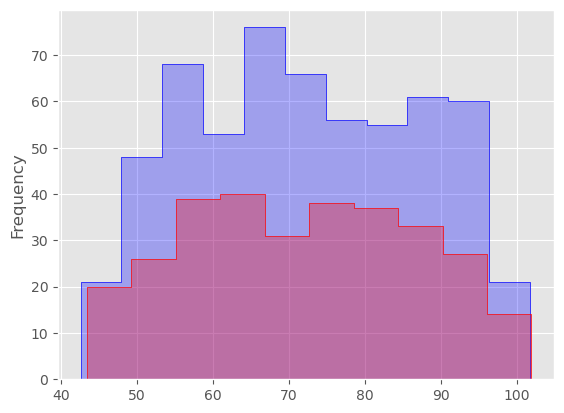

In [58]:
# What to do with the diameter column? Indeed, according to "tyres" theory it should be a relevant parameter for describing tyres' failure.
# Let's try to see simply whether its "predictive" power...

X_0 = df[df["failure"] == 0]
X_1 = df[df["failure"] == 1]

pic1 = sns.histplot(X_0["diameter"], color="black", element="step",alpha=0.3) #ALpha is a "transparency" variable
pic2 = sns.histplot(X_1["diameter"], color="red", element="step",alpha=0.3)

pic1.set(xlabel = None)
pic2.set(ylabel = "Frequency")

# plt.savefig("../figures/Diameter Relevance.png")
plt.show()


 ### Results
 #### We have decided to remove the diamter column since it appears to be "not-so-relevant" for predicting and because of 2/3 of missing-data rows

In [8]:
# Outliers Detection: Division between categorical and numerical 
# Dropped the diameter attribute
df = df.dropna(axis = 1)
df_categorical = df[["tread_type", "tyre_season", "month", "tread_depth", "wiring_strength", "tyre_quality", "add_layers","failure"]]
df_numerical = df[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp","failure"]]

print(df_numerical.shape)
print(df_categorical.shape)


(3000, 8)
(3000, 8)


<AxesSubplot:>

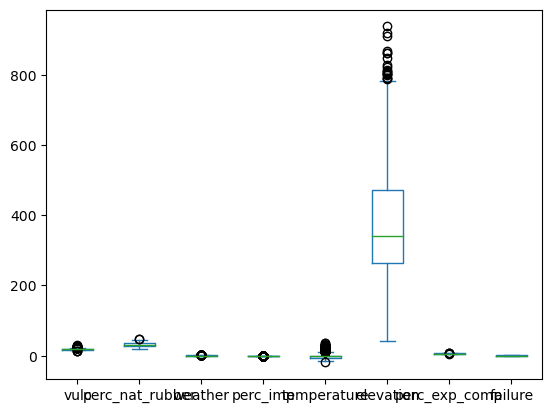

In [9]:
# Outliers' detection only on numeric variables (not categorcal since seen before that no "wrong" values exist)
df_numerical.plot.box()

array([[<AxesSubplot:title={'center':'vulc'}>,
        <AxesSubplot:title={'center':'perc_nat_rubber'}>,
        <AxesSubplot:title={'center':'weather'}>],
       [<AxesSubplot:title={'center':'perc_imp'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'elevation'}>],
       [<AxesSubplot:title={'center':'perc_exp_comp'}>,
        <AxesSubplot:title={'center':'failure'}>, <AxesSubplot:>]],
      dtype=object)

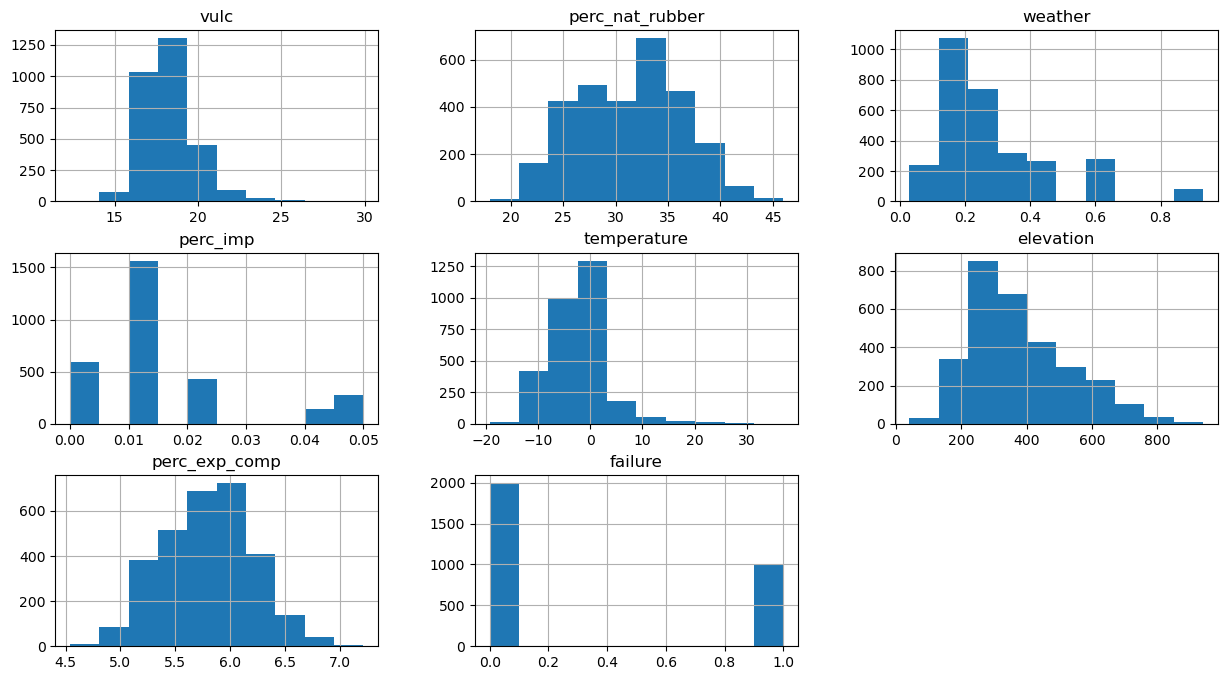

In [10]:
# Checking distribution

df[df_numerical.columns].hist(figsize=[15,8])


# Transforming "vulc" and "temperature" could be sensless. Anyways scaling them migth have sense in order to 
# bring them on similar scales

In [46]:
# Scaling data.... Not finished yet
from sklearn.preprocessing import MinMaxScaler
import pickle
scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))
columns = df_numerical[:-1].columns
scaler.fit(df_numerical.drop("failure",axis=1))
scaled_numerical = scaler.transform(df_numerical.drop('failure',axis=1))
scaled_numerical=pd.DataFrame(scaled_numerical, columns=df_numerical.columns[:-1])
pickle.dump(scaler, open("min_max_scaler_1.pkl", "wb"))

scaled_numerical.head()


,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,-0.355505,-0.428571,-0.711111,-0.6,-0.603412,-0.351893,-0.558052
1,-0.047446,0.285714,-0.400000,-0.6,-0.475480,-0.361915,0.205993
2,-0.223156,0.142857,-0.400000,-0.6,-0.353234,-0.542316,0.363296
3,-0.490352,0.214286,-0.644444,-0.2,-0.050462,-0.183742,0.558052
4,-0.451986,-0.642857,-0.200000,-0.6,0.769723,-0.406459,0.205993


In [47]:
import numpy as np
failure = df_numerical["failure"].astype(np.int32)
df_numerical_scaled = scaled_numerical.join(failure)
df_numerical_scaled

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,-0.355505,-0.428571,-0.711111,-0.6,-0.603412,-0.351893,-0.558052,0
1,-0.047446,0.285714,-0.400000,-0.6,-0.475480,-0.361915,0.205993,0
2,-0.223156,0.142857,-0.400000,-0.6,-0.353234,-0.542316,0.363296,0
3,-0.490352,0.214286,-0.644444,-0.2,-0.050462,-0.183742,0.558052,0
4,-0.451986,-0.642857,-0.200000,-0.6,0.769723,-0.406459,0.205993,0
...,...,...,...,...,...,...,...,...
2995,-0.375028,-0.214286,-0.200000,-0.6,-0.056148,-0.452116,-0.146067,1
2996,-0.459251,-0.142857,-0.577778,-1.0,-0.366027,-0.752784,-0.048689,1
2997,-0.562089,0.071429,-0.200000,-0.6,-0.437100,-0.569042,-0.228464,0
2998,-0.255392,0.357143,-1.000000,-1.0,-0.341862,-0.446548,0.011236,0


In [14]:
df_categorical = df_categorical.drop("failure",axis=1)
df_scaled = df_categorical.join(df_numerical_scaled)

failure
0    1992
1    1008
dtype: int64


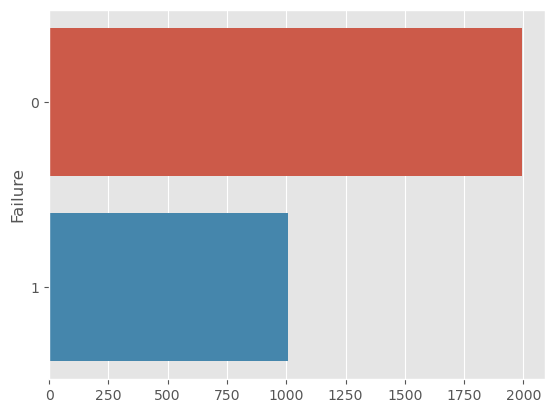

In [48]:
# Is the dataset Balanced or Unbalanced? 

print(df_scaled.groupby('failure').size()) #"target" is the name of the target column, change it accordingly to your dataset
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df_scaled.failure ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("")
plt.ylabel("Failure")

plt.savefig("../figures/Imbalanced Data-set.png")
plt.show()
# Unbalanced dataset with ratio 2:1. Shall we try with over- or under-sampling?

(2016, 15)


Text(0, 0.5, 'Failure')

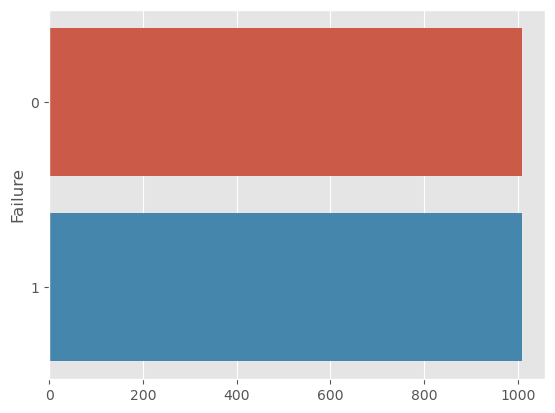

In [52]:
# We are going to downsample the majority class
from sklearn.utils import resample


df_majority = df_scaled[df_scaled["failure"]==0]
df_minority = df_scaled[df_scaled["failure"]==1]

df_majority_downsample = resample(df_majority, replace=False,n_samples= len(df_minority), random_state=69)
df = pd.concat([df_majority_downsample,df_minority])
print(df.shape)

sns.countplot(y=df.failure ,data=df) # Checking the distribution is 50/50
plt.xlabel("")
plt.ylabel("Failure")

## Feature selection

This decision will be made according to how the explanatory variables behave with respect to the dependent one.


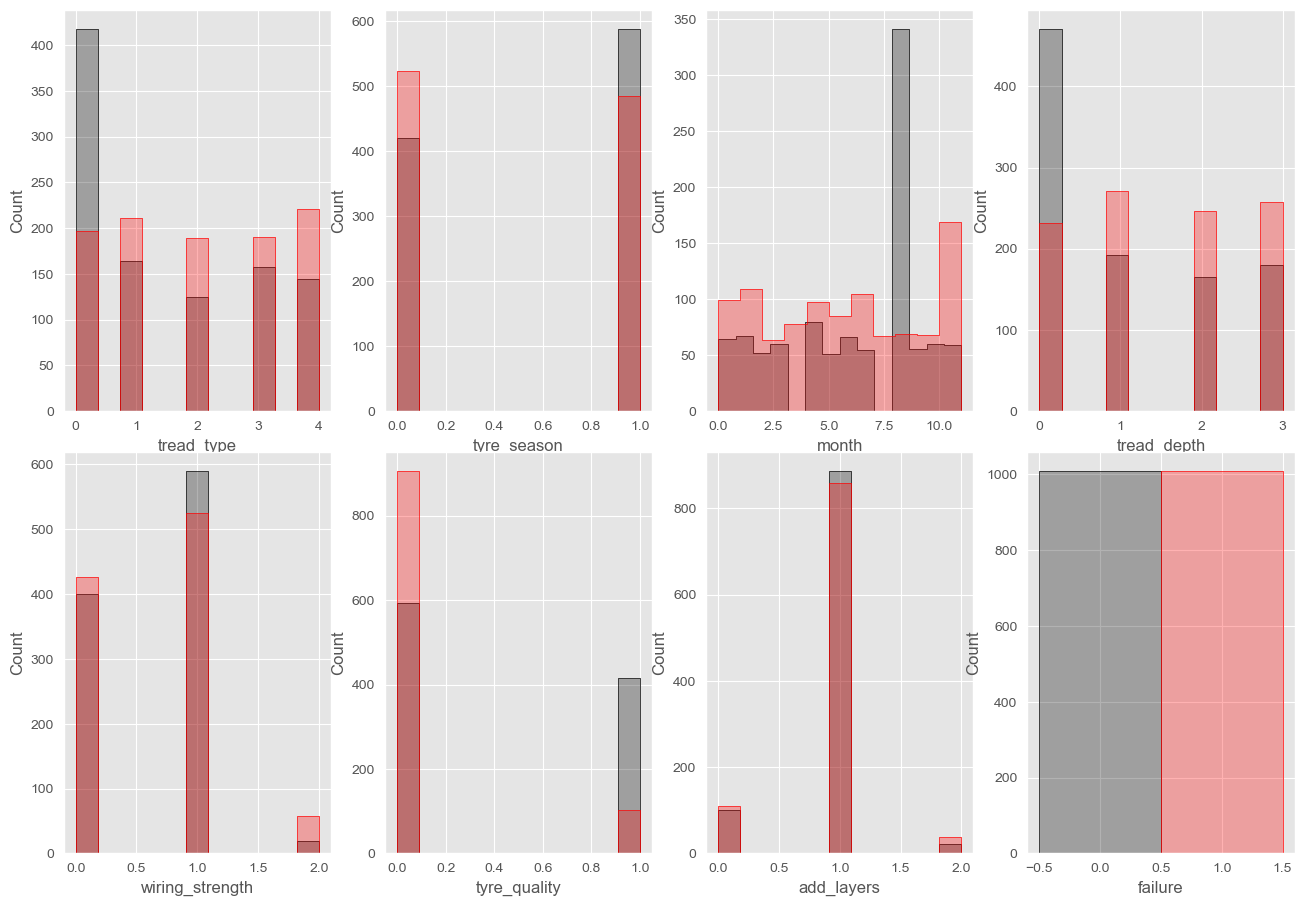

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


df_categorical = df[["tread_type", "tyre_season", "month", "tread_depth", "wiring_strength", "tyre_quality", "add_layers","failure"]]
df_numerical = df[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp","failure"]]
X_0_c = df_categorical[df_categorical["failure"] == 0]
X_1_c = df_categorical[df_categorical["failure"] == 1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(13,9))
fig.tight_layout()


for i, ax in zip(range(df_categorical.columns.size), axes.flat):
    sns.histplot(X_0_c.iloc[:,i], color="black", element="step", ax=ax,  alpha=0.3)#ALpha is a "transparency" variable
    sns.histplot(X_1_c.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

# Maybe temperature, weather 

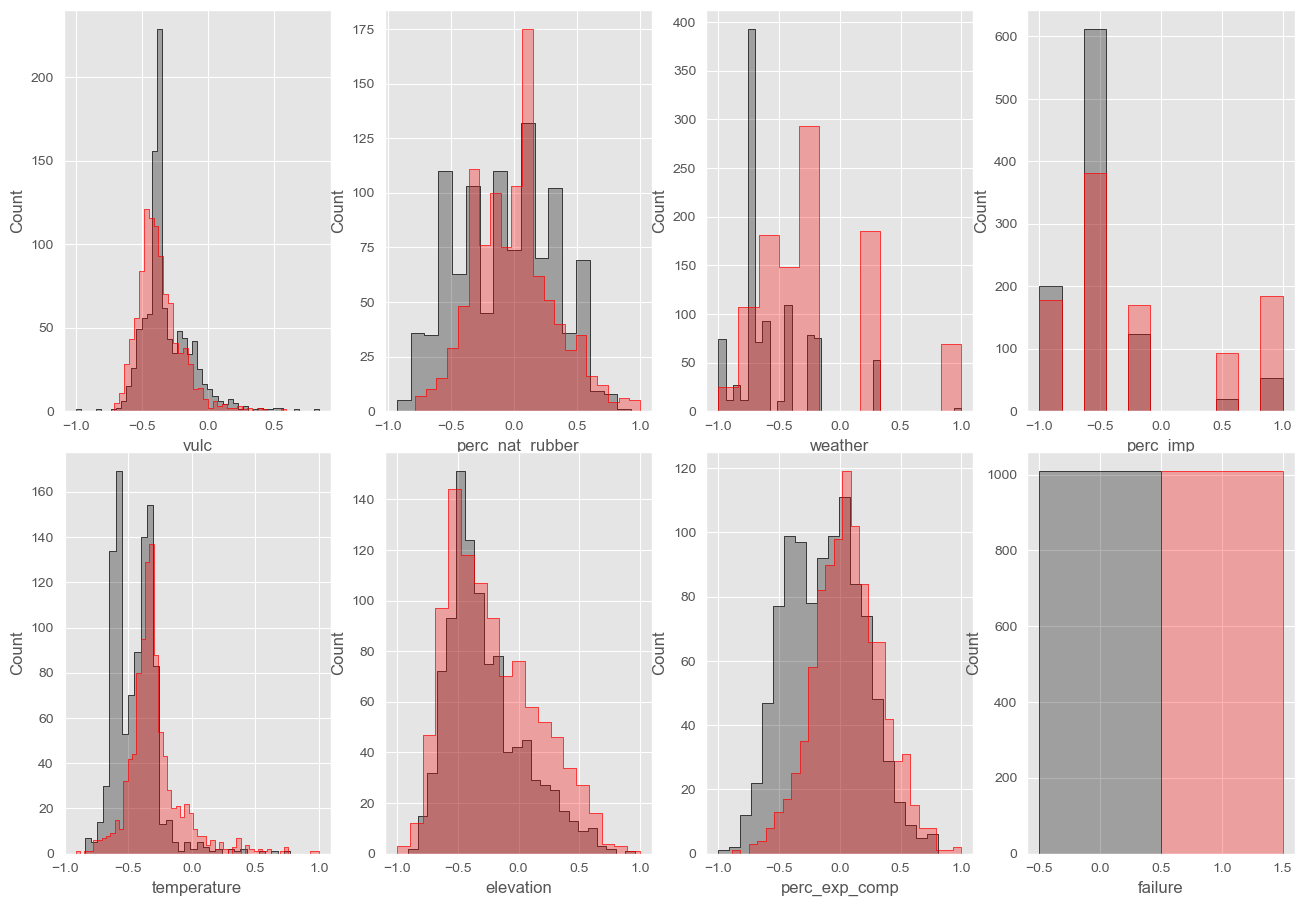

In [29]:
X_0_n = df_numerical[df_numerical["failure"] == 0]
X_1_n = df_numerical[df_numerical["failure"] == 1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(13,9))
fig.tight_layout()


for i, ax in zip(range(df_numerical.columns.size), axes.flat):
    sns.histplot(X_0_n.iloc[:,i], color="black", element="step", ax=ax,  alpha=0.3)#ALpha is a "transparency" variable
    sns.histplot(X_1_n.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

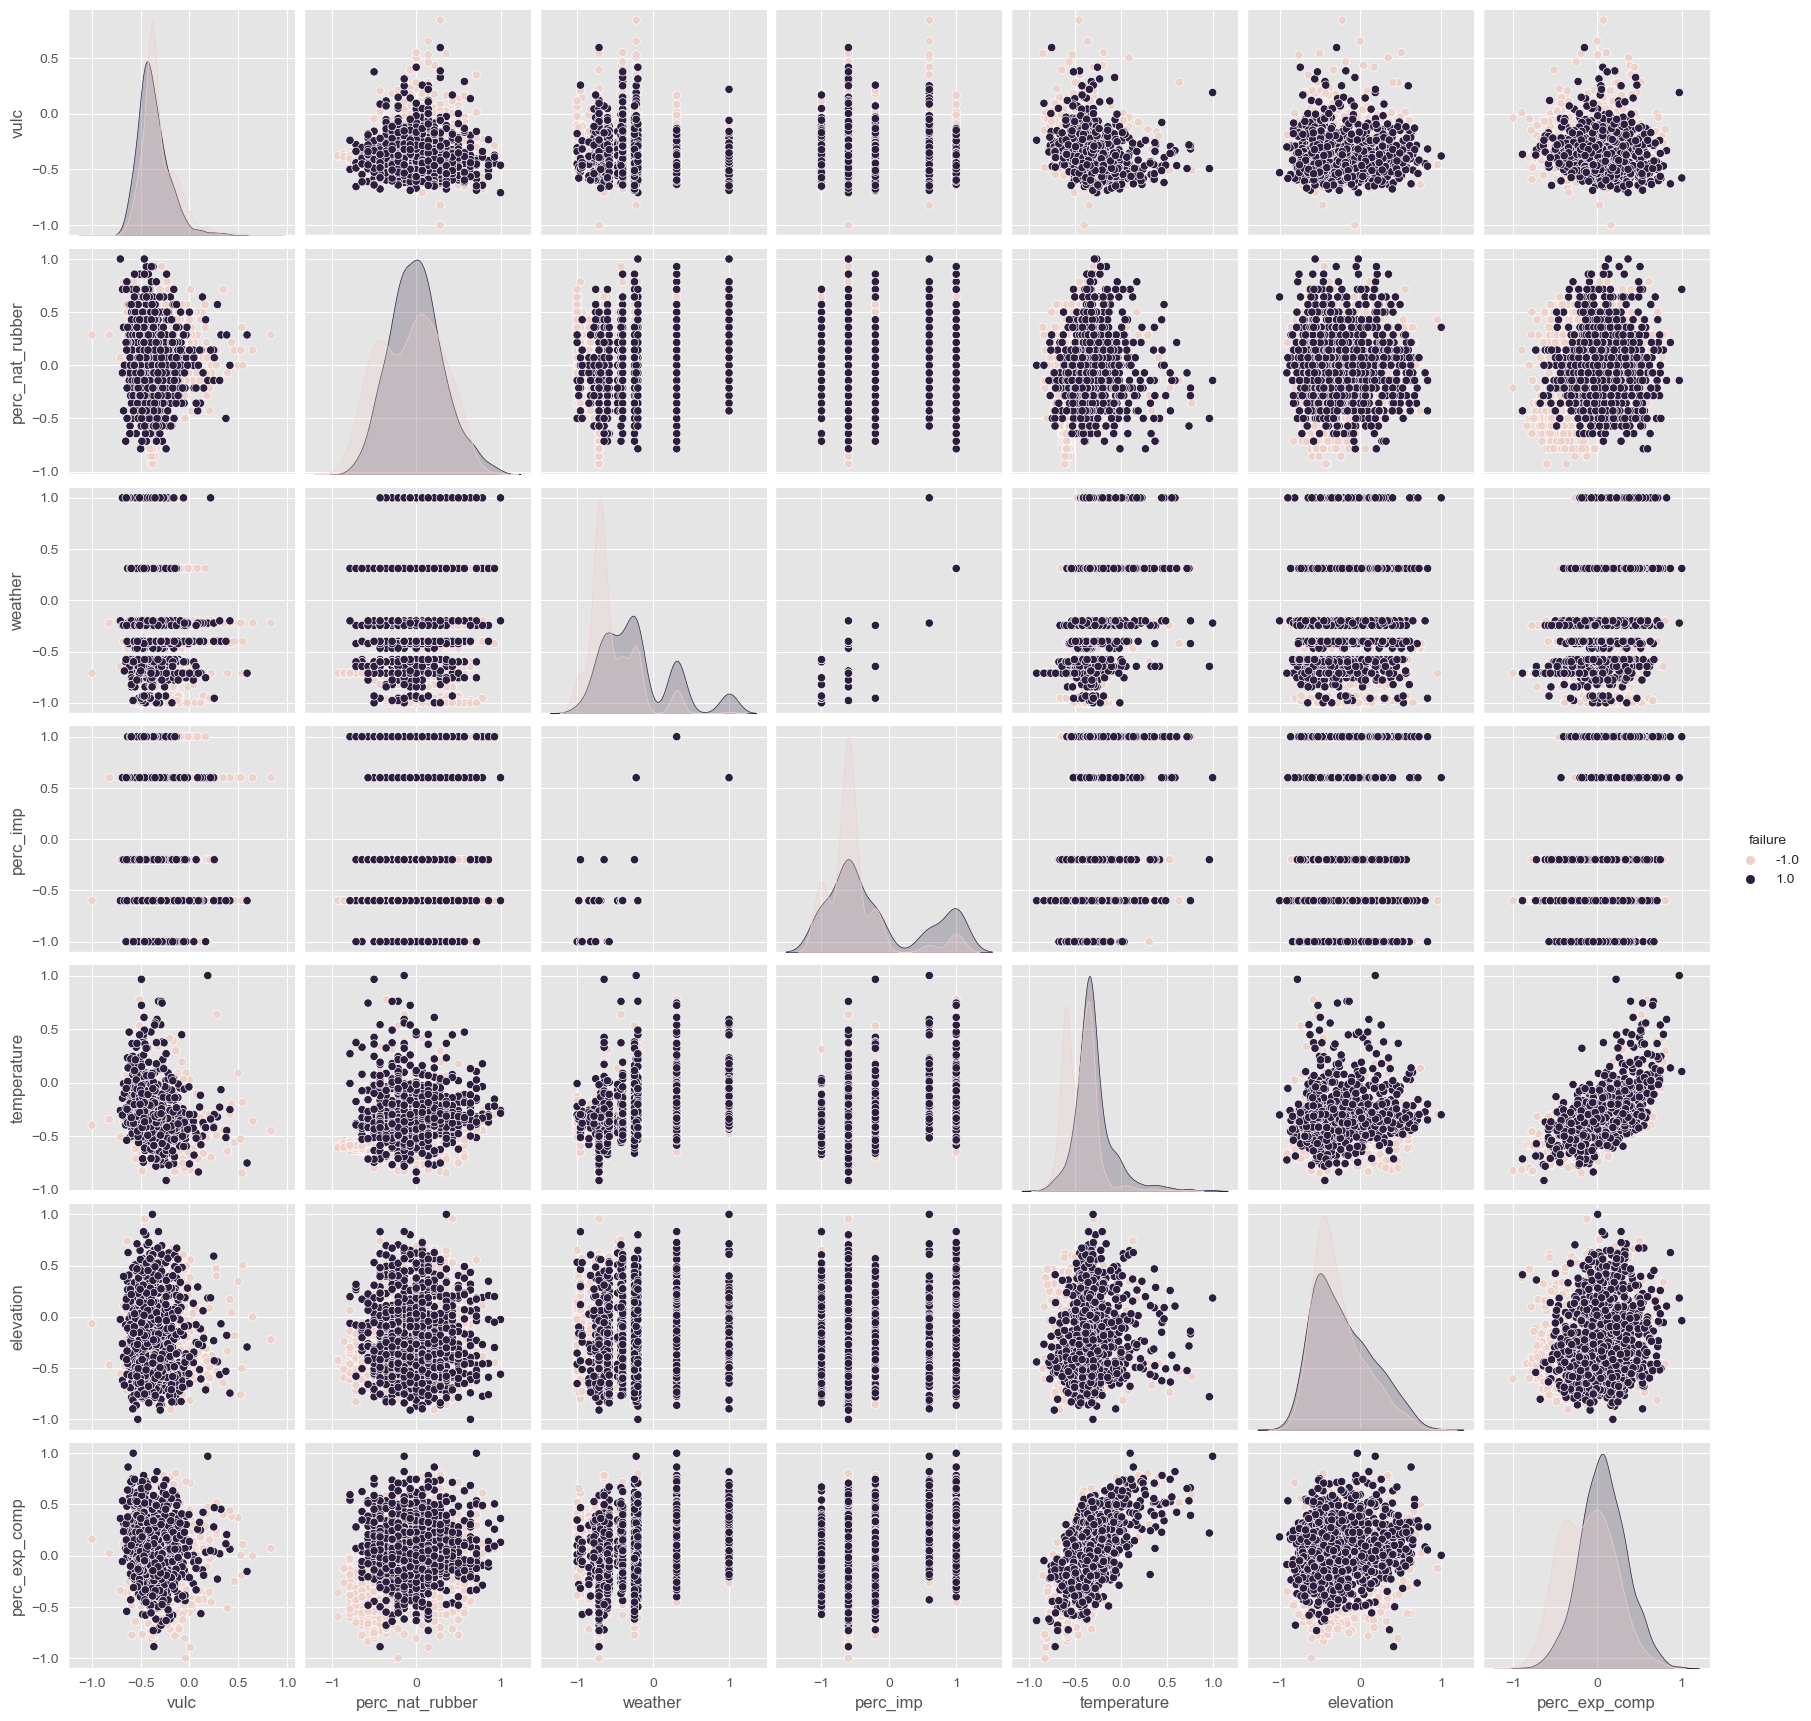

In [121]:
sns.pairplot(df_numerical, hue='failure')

<AxesSubplot:>

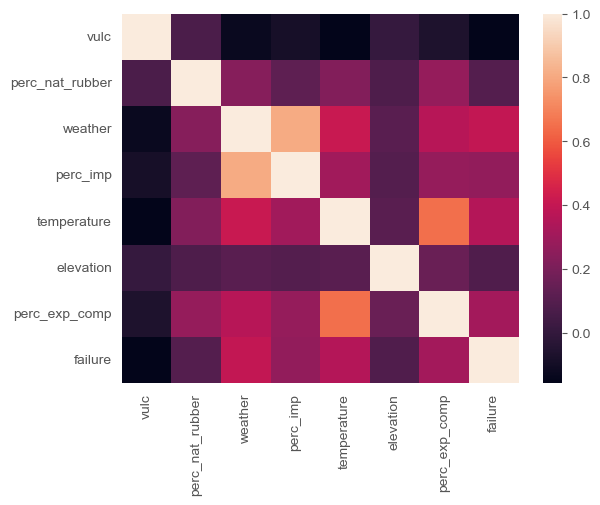

In [30]:
sns.heatmap(df_numerical.corr())

In [31]:
import numpy as np

df_categorical = df_categorical.astype("category")
dummies = pd.get_dummies(df_categorical)
dummies.tail()

df = pd.concat([dummies,df_numerical], axis =1)
df.head()

for column in df.columns:
    if df[column].dtype == 'uint8':
        df[column] = df[column].astype(np.int32)

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 228 to 2996
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tread_type_0       2016 non-null   int32  
 1   tread_type_1       2016 non-null   int32  
 2   tread_type_2       2016 non-null   int32  
 3   tread_type_3       2016 non-null   int32  
 4   tread_type_4       2016 non-null   int32  
 5   tyre_season_0      2016 non-null   int32  
 6   tyre_season_1      2016 non-null   int32  
 7   month_0            2016 non-null   int32  
 8   month_1            2016 non-null   int32  
 9   month_2            2016 non-null   int32  
 10  month_3            2016 non-null   int32  
 11  month_4            2016 non-null   int32  
 12  month_5            2016 non-null   int32  
 13  month_6            2016 non-null   int32  
 14  month_7            2016 non-null   int32  
 15  month_8            2016 non-null   int32  
 16  month_9            201

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_2,...,failure_0,failure_1,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
228,1,0,0,0,0,0,1,0,0,0,...,1,0,-0.387287,-0.428571,-0.711111,-0.6,-0.563611,-0.641425,-0.490637,0
6,1,0,0,0,0,1,0,0,0,0,...,1,0,0.005675,0.071429,-0.200000,-0.6,-0.395878,-0.045657,0.445693,0
2017,1,0,0,0,0,1,0,0,0,0,...,1,0,-0.388876,0.500000,-0.400000,-0.6,-0.151386,-0.690423,0.101124,0
880,1,0,0,0,0,1,0,0,0,0,...,1,0,-0.260613,0.142857,-0.400000,-0.6,-0.377399,-0.093541,-0.205993,0
1767,0,0,0,0,1,1,0,0,0,0,...,1,0,-0.398411,0.500000,-1.000000,-1.0,-0.378820,-0.339644,0.191011,0


## Splitting data

In [32]:

#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,:-1]
y = df.iloc[:,-1] #[-1]]
#X.head()
y.head()

228     0
6       0
2017    0
880     0
1767    0
Name: failure, dtype: int32

In [44]:
from sklearn.model_selection import train_test_split
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.50, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    random_state= 123
                                                   ) #fix random seed for replicability
print(X_train.shape,X_test.shape)

(1008, 40) (1008, 40)


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40)}
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=90, n_jobs=-1)
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


In [46]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.997044 using {'n_neighbors': 13}
Mean 0.959165 Std (0.011121) with: {'n_neighbors': 1}
Mean 0.959108 Std (0.014500) with: {'n_neighbors': 2}
Mean 0.986286 Std (0.007349) with: {'n_neighbors': 3}
Mean 0.991045 Std (0.006487) with: {'n_neighbors': 4}
Mean 0.993111 Std (0.003696) with: {'n_neighbors': 5}
Mean 0.993052 Std (0.005641) with: {'n_neighbors': 6}
Mean 0.995089 Std (0.002785) with: {'n_neighbors': 7}
Mean 0.994083 Std (0.002437) with: {'n_neighbors': 8}
Mean 0.996067 Std (0.001403) with: {'n_neighbors': 9}
Mean 0.996061 Std (0.001399) with: {'n_neighbors': 10}
Mean 0.996061 Std (0.001399) with: {'n_neighbors': 11}
Mean 0.995072 Std (0.001399) with: {'n_neighbors': 12}
Mean 0.997044 Std (0.002416) with: {'n_neighbors': 13}
Mean 0.996061 Std (0.001399) with: {'n_neighbors': 14}
Mean 0.995089 Std (0.003678) with: {'n_neighbors': 15}
Mean 0.995084 Std (0.002781) with: {'n_neighbors': 16}
Mean 0.996067 Std (0.003679) with: {'n_neighbors': 17}
Mean 0.996067 Std (0.003679

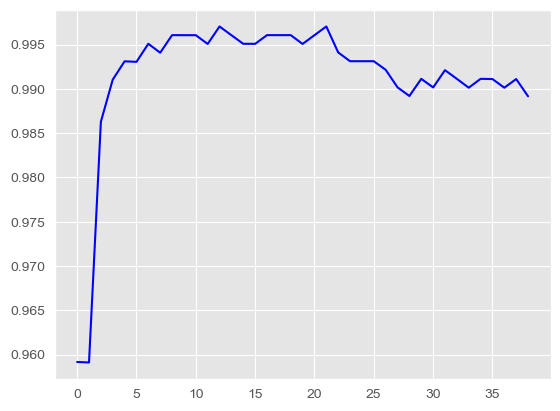

0.997044329243104


In [47]:
import matplotlib.pyplot as plt
plt.plot (means, color='blue', alpha=1.00)
plt.show()
print(gs.best_score_)

In [48]:
#TEST ON YOUR TEST SET
best_model = gs.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

C:\Users\masch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\masch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [49]:
from sklearn import metrics
#EVALUATE YOUR PREDICTION IN THE TRAINING SET
y_pred_train = best_model.predict(X_train)
print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  1.0
recall:  1.0
f1_score:  1.0
accuracy:  1.0


C:\Users\masch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.9940119760479041
recall:  0.9979959919839679
f1_score:  0.996
accuracy:  0.996031746031746


In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[506   3]
 [  1 498]]


C:\Users\masch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\masch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

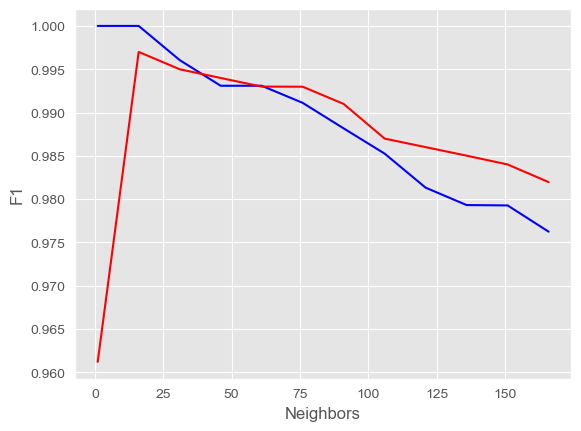

In [53]:
score_train=[]
score_test=[]
neighbors=range(1,180,15)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train))
    score_test.append( metrics.f1_score(y_test, y_pred_test))
plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)
plt.show()